<a href="https://colab.research.google.com/github/sterlinggutterman/Final-Project/blob/main/Project_Phase_1_EDA_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Final Project Phase 1 - EDA/Wrangling***

## Set up

In [1]:
! git clone https://github.com/sterlinggutterman/Final-Project

Cloning into 'Final-Project'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 29 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (29/29), 16.06 MiB | 5.64 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing data
aisles_df = pd.read_csv('/content/Final-Project/aisles.csv',low_memory=False)
departments_df = pd.read_csv('/content/Final-Project/departments.csv',low_memory=False)
products_df = pd.read_csv('/content/Final-Project/products.csv',low_memory=False)
orders_df = pd.read_csv('/content/orders.csv',low_memory=False)
order_products_prior_df = pd.read_csv('/content/order_products__prior.csv',low_memory=False)

## Products

In [4]:
# merging products datasets
complete_products_df = pd.merge(products_df, aisles_df, on='aisle_id', how='inner')
complete_products_df = pd.merge(complete_products_df, departments_df, on='department_id', how='inner')
complete_products_df.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


In [5]:
# shape of products
print(complete_products_df.shape,'\n')
print(complete_products_df.dtypes, '\n')
print(complete_products_df.columns,'\n')
complete_products_df.dtypes

(49688, 6) 

product_id        int64
product_name     object
aisle_id          int64
department_id     int64
aisle            object
department       object
dtype: object 

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'aisle',
       'department'],
      dtype='object') 



,0
product_id,int64
product_name,object
aisle_id,int64
department_id,int64
aisle,object
department,object


In [6]:
# information on departments
print(complete_products_df['department'].unique(),'\n')
print(complete_products_df['department'].value_counts(),'\n')

['snacks' 'pantry' 'beverages' 'frozen' 'personal care' 'dairy eggs'
 'household' 'babies' 'meat seafood' 'dry goods pasta' 'pets' 'breakfast'
 'canned goods' 'produce' 'missing' 'international' 'deli' 'alcohol'
 'bakery' 'other' 'bulk'] 

department
personal care      6563
snacks             6264
pantry             5371
beverages          4365
frozen             4007
dairy eggs         3449
household          3085
canned goods       2092
dry goods pasta    1858
produce            1684
bakery             1516
deli               1322
missing            1258
international      1139
breakfast          1115
babies             1081
alcohol            1054
pets                972
meat seafood        907
other               548
bulk                 38
Name: count, dtype: int64 



Text(0.5, 1.0, 'Distribution of department')

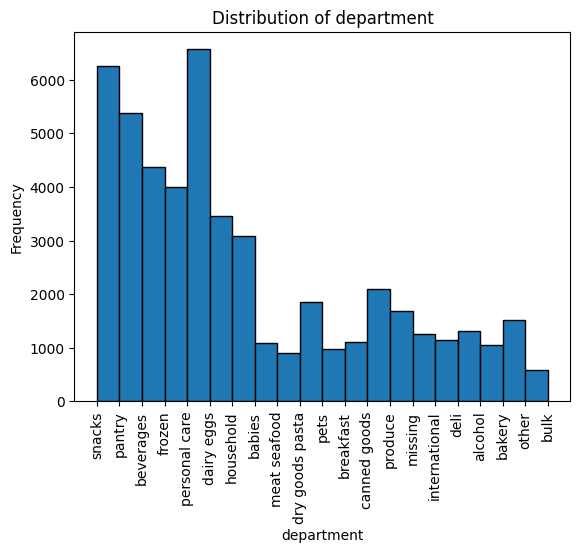

In [7]:
# departments histogram
plt.hist(complete_products_df['department'], bins=20, edgecolor='black')
plt.xlabel('department')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('Distribution of department')

In [8]:
# information on aisles
print(complete_products_df['aisle'].unique(),'\n')
print(complete_products_df['aisle'].value_counts(),'\n')

['cookies cakes' 'spices seasonings' 'tea' 'frozen meals'
 'marinades meat preparation' 'cold flu allergy' 'juice nectars'
 'frozen produce' 'yogurt' 'water seltzer sparkling water' 'refrigerated'
 'frozen dessert' 'dish detergents' 'diapers wipes' 'ice cream toppings'
 'poultry counter' 'frozen pizza' 'grains rice dried goods'
 'dog food care' 'oral hygiene' 'packaged poultry' 'vitamins supplements'
 'energy granola bars' 'cat food care' 'body lotions soap' 'cereal'
 'canned jarred vegetables' 'packaged vegetables fruits' 'chips pretzels'
 'dry pasta' 'hot dogs bacon sausage' 'soup broth bouillon' 'missing'
 'energy sports drinks' 'crackers' 'fresh vegetables'
 'frozen breads doughs' 'asian foods' 'more household'
 'tofu meat alternatives' 'doughs gelatins bake mixes' 'hair care'
 'specialty wines champagnes' 'popcorn jerky' 'plates bowls cups flatware'
 'tortillas flat bread' 'fruit vegetable snacks' 'pasta sauce'
 'lunch meat' 'baby food formula' 'salad dressing toppings' 'spreads'


Text(0.5, 1.0, 'Distribution of aisle')

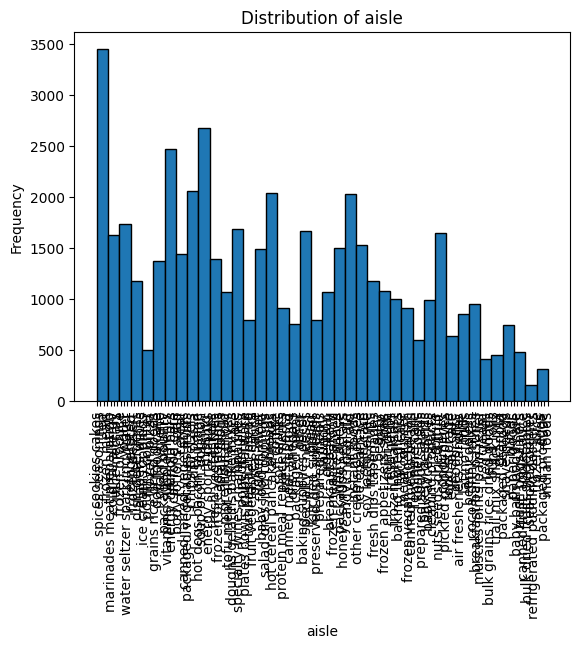

In [9]:
# aisles histogram
plt.hist(complete_products_df['aisle'], bins=40, edgecolor='black')
plt.xlabel('aisle')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('Distribution of aisle')

## Orders

In [3]:
# mergering orders datasets
complete_orders_df = pd.merge(orders_df, order_products_prior_df, on='order_id', how='inner')
complete_orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0


In [11]:
# shape of orders
print(complete_orders_df.shape,'\n')
print(complete_orders_df.dtypes, '\n')
print(complete_orders_df.columns,'\n')
complete_orders_df.dtypes

(32434489, 10) 

order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
dtype: object 

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered'],
      dtype='object') 



,0
order_id,int64
user_id,int64
eval_set,object
order_number,int64
order_dow,int64
order_hour_of_day,int64
days_since_prior_order,float64
product_id,int64
add_to_cart_order,int64
reordered,int64


After coercion: 
 count    3.035642e+07
mean     1.110407e+01
std      8.778914e+00
min      0.000000e+00
25%      5.000000e+00
50%      8.000000e+00
75%      1.500000e+01
max      3.000000e+01
Name: days_since_prior_order, dtype: float64 

Total Missings: 
 2078068 



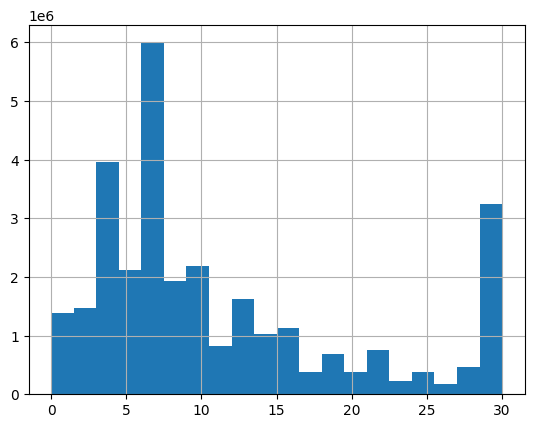

In [12]:
# attempting to clean days_since_prior_order variable
complete_orders_df['days_since_prior_order'] = pd.to_numeric(complete_orders_df['days_since_prior_order'], errors='coerce')

complete_orders_df['days_nan'] = complete_orders_df['days_since_prior_order'].isnull()

print('After coercion: \n', complete_orders_df['days_since_prior_order'].describe(), '\n')
complete_orders_df['days_since_prior_order'].hist(bins=20)
print('Total Missings: \n', sum(complete_orders_df['days_nan']),'\n')

In [13]:
# adding a column indicating Yes/No reordered
complete_orders_df['reordered_yes/no'] = np.where(complete_orders_df['reordered'] == 0, ' no', 'yes')

In [14]:
complete_orders_df['reordered_yes/no']

,reordered_yes/no
0,no
1,no
2,no
3,no
4,no
...,...
32434484,yes
32434485,no
32434486,no
32434487,no


In [15]:
# adding a column indicating the day of the week ordered
complete_orders_df['order_day'] = complete_orders_df['order_dow'].map({0: 'saturday', 1: 'sunday', 2: 'monday',
3: 'tuesday', 4:'wednesday', 5: 'thursday', 6: 'friday'})

In [16]:
complete_orders_df['order_day']

,order_day
0,monday
1,monday
2,monday
3,monday
4,monday
...,...
32434484,sunday
32434485,sunday
32434486,sunday
32434487,sunday


In [17]:
print(complete_orders_df['order_day'].value_counts())
print(complete_orders_df['order_day'].describe())

order_day
saturday     6209666
sunday       5665856
friday       4500304
monday       4217798
thursday     4209533
tuesday      3844117
wednesday    3787215
Name: count, dtype: int64
count     32434489
unique           7
top       saturday
freq       6209666
Name: order_day, dtype: object


<Axes: xlabel='order_day', ylabel='Count'>

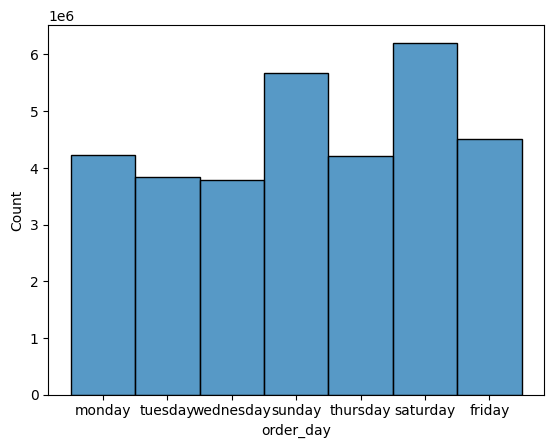

In [18]:
# histogram of order day of week
sns.histplot(data=complete_orders_df,x='order_day',bins=7)

<Axes: xlabel='order_dow', ylabel='Density'>

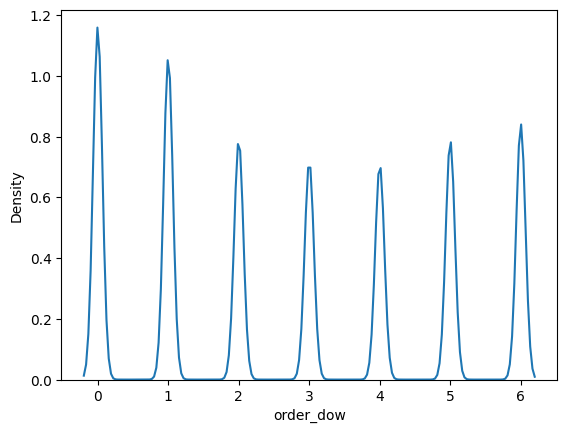

In [19]:
# kernel density plot of order day of week
sns.kdeplot(data=complete_orders_df,x='order_dow')

<Axes: xlabel='order_hour_of_day', ylabel='Count'>

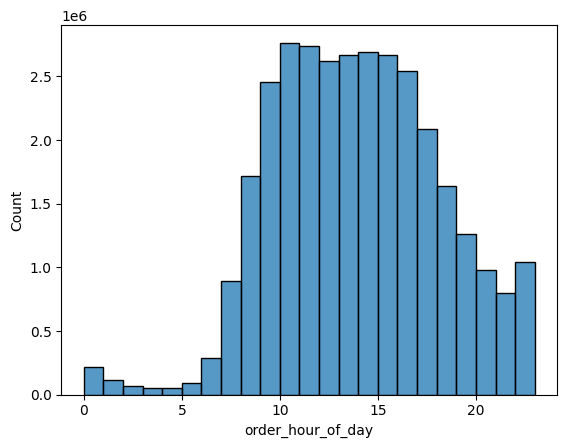

In [20]:
# histogram of hours of day
sns.histplot(data=complete_orders_df,x='order_hour_of_day',bins=23)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='add_to_cart_order'>

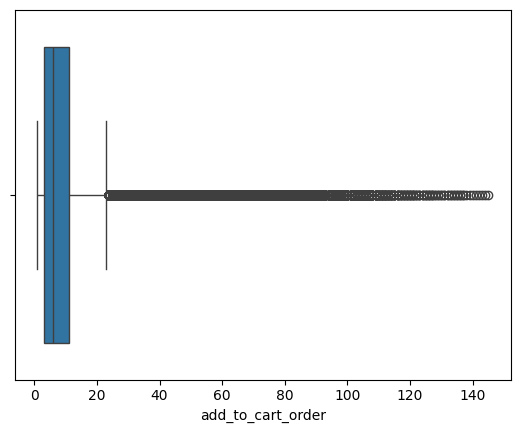

In [4]:
# box plot of add to cart order
sns.boxplot(data=complete_orders_df,x='add_to_cart_order')

In [ ]:
# cross-tabulation of days of week and reorders
pd.crosstab(complete_orders_df['order_day'],complete_orders_df['reordered_yes/no'])

reordered_yes/no,no,yes
order_day,,
friday,195129,261923
monday,178375,254876
saturday,260310,368746
sunday,229860,347716
thursday,172301,255613
tuesday,161315,229766
wednesday,159493,230063


## Code for merging products and orders - currently does not work due to RAM space

In [ ]:
# mergering orders with products
# full_df = pd.merge(complete_orders_df, complete_products_df, on='product_id', how='inner')
# full_df.head()